In [5]:
# %pip install itables
from itables import init_notebook_mode
import itables.options as opt

# Ativa o modo interativo
init_notebook_mode(all_interactive=True)
opt.buttons = [
    "copy",
    {
        "extend": "csvHtml5",
        "text": "CSV",          
        "fieldBoundary": "",     
        "extension": ".csv"      
    },
    "excel",
    "pdf"
]
opt.classes = ["display", "nowrap"]
opt.scrollY = "400px"       
opt.scrollCollapse = True   
opt.scrollX = True         
opt.paging = False          



In [2]:
import os
import sys
from IPython.display import display, Markdown
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


#.experimentsv2 import Experiment
root_path = os.path.abspath("..")  
if root_path not in sys.path:
    sys.path.insert(0, root_path)
os.chdir("..")

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import load_iris
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, Markdown

%load_ext autoreload
%autoreload 2




from experiments.experiments import Experiment
data = load_iris()
print(data.DESCR)
X, y = data.data, data.target
#########BASE LINE############
models = {
    "Random": DummyClassifier(),
    "OneR": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier()
}
model_parameters = {
    "Random": {"strategy": ["most_frequent"]},
    "OneR": {"max_depth": [1]},
    "kNN": {"n_neighbors": [1]}
}
labels_iris = ["setosa", "versicolor", "virginica"]
exp = Experiment(X, y, models, model_parameters,labels=labels_iris)

experiments,cms,cm_total = exp.run_train_only()
display(Markdown("## Exercise 2.1"))
display(cms)
display(Markdown("### Train-only"))
display(experiments)

experiments,cms,cm_total = exp.run_train_test()
display(Markdown("### Train-Test 70-30"))
display(experiments)
display(cms)



experiments,cm_stats = exp.run_cross_validation(n_splits=10)
display(Markdown("### 10x10-fold cross-validation"))
display(experiments)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Exercise 2.1

[                 Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor           50                0               0
 Real_virginica            50                0               0,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               50               0
 Real_virginica             0               50               0,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               50               0
 Real_virginica             0                0              50]

### Train-only

,Model,strategy,Accuracy,Recall,Precision,F1,max_depth,n_neighbors
0,Random,most_frequent,0.333333,0.333333,0.111111,0.166667,NaN,NaN
1,OneR,NaN,0.666667,0.666667,0.500000,0.555556,1.0,NaN
2,kNN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.0


### Train-Test 70-30

,Model,strategy,Accuracy,Recall,Precision,F1,max_depth,n_neighbors
0,Random,most_frequent,0.333333,0.333333,0.111111,0.166667,NaN,NaN
1,OneR,NaN,0.666667,0.666667,0.500000,0.555556,1.0,NaN
2,kNN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.0


[                 Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               15                0               0
 Real_versicolor           15                0               0
 Real_virginica            15                0               0,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               15                0               0
 Real_versicolor            0                0              15
 Real_virginica             0                0              15,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               15                0               0
 Real_versicolor            0               15               0
 Real_virginica             0                0              15]

### 10x10-fold cross-validation

,Model,strategy,Accuracy_Mean,Accuracy_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_Mean,F1_Std,max_depth,n_neighbors
0,Random,most_frequent,0.222667,0.066145,0.33000,0.033166,0.074222,0.022048,0.119733,0.031107,NaN,NaN
1,OneR,NaN,0.598667,0.083788,0.66500,0.016583,0.462428,0.041341,0.517809,0.042172,1.0,NaN
2,kNN,NaN,0.959333,0.049795,0.95938,0.050902,0.961597,0.051796,0.956592,0.054884,NaN,1.0


In [8]:
# 1. Extração para variáveis individuais
# Usamos o início do nome (Random, OneR, kNN) para encontrar a chave correta
matriz_mean_random = next(v['mean_matrix'] for k, v in cm_stats.items() if k.startswith("Random"))
matriz_std_random = next(v['std_matrix'] for k, v in cm_stats.items() if k.startswith("Random"))


matriz_mean_oner   = next(v['mean_matrix'] for k, v in cm_stats.items() if k.startswith("OneR"))
matriz_std_oner   = next(v['std_matrix'] for k, v in cm_stats.items() if k.startswith("OneR"))


matriz_mean_knn    = next(v['mean_matrix'] for k, v in cm_stats.items() if k.startswith("kNN"))
matriz_std_knn    = next(v['std_matrix'] for k, v in cm_stats.items() if k.startswith("kNN"))

# 2. Visualização Individual
print("=== Matrizes de confusão: Random ===")
display(matriz_mean_random)
display(matriz_std_random)


print("\n=== Matrizes de confusão: OneR ===")
display(matriz_mean_oner)
display(matriz_std_oner)

print("\n=== Matriz Média: kNN ===")
display(matriz_mean_knn)
display(matriz_std_knn)

=== Matrizes de confusão: Random ===


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)



=== Matrizes de confusão: OneR ===


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)



=== Matriz Média: kNN ===


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


In [4]:

models = {
    "kNN": KNeighborsClassifier()
}
model_parameters = {
    "kNN": {"n_neighbors": [1]}
}
exp = Experiment(X, y, models, model_parameters)

experiments,cms,cm_total = exp.run_train_only()
display(Markdown("## Exercise 2.2"))
display(Markdown("### Exercise 2.2.1"))
display(Markdown("#### Train-only"))
display(experiments)

experiments,cms,cm_total = exp.run_train_test()
display(Markdown("#### Train-Test 70-30"))
display(experiments)


experiments,dict= exp.run_cross_validation(n_splits=10)
display(Markdown("#### 10x10-fold cross-validation"))
display(experiments)

#################################################
################Exercise 2.2.2###################
#################################################

models = {
    "kNN": KNeighborsClassifier()
}
model_parameters = {
    "kNN": {"n_neighbors": list(range(1, 16, 2))}###até 15
}
exp = Experiment(X, y, models, model_parameters,labels=labels_iris)
experiments,cms,cm_total = exp.run_train_only()

display(Markdown("### Exercise 2.2.2"))
display(Markdown("#### Train-only"))
display(experiments)
display(cms)

experiments,cms,cm_total = exp.run_train_test()
display(Markdown("#### Train-Test 70-30"))
display(experiments)

validation,results,cms = exp.run_train_test_validation(val_size=0.3,test_size=0.3)
display(Markdown("#### Train-Test-Validation 40-30-30"))
display(results)


experiments,ex2_2cms = exp.run_cross_validation(n_splits=10, n_repeats=1)
display(Markdown("#### 10x10-fold cross-validation"))
display(experiments)


## Exercise 2.2

### Exercise 2.2.1

#### Train-only

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


#### Train-Test 70-30

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


#### 10x10-fold cross-validation

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


### Exercise 2.2.2

#### Train-only

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


[                 Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               50               0
 Real_virginica             0                0              50,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               47               3
 Real_virginica             0                3              47,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               47               3
 Real_virginica             0                2              48,
                  Pred_setosa  Pred_versicolor  Pred_virginica
 Real_setosa               50                0               0
 Real_versicolor            0               47               3
 Real_virginica             0                1      

#### Train-Test 70-30

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


#### Train-Test-Validation 40-30-30

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


#### 10x10-fold cross-validation

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


In [5]:
from utils.metrics import mean_std_confusion_by_model


mean_by_model, std_by_model = mean_std_confusion_by_model(ex2_2cms)

In [41]:
display(mean_by_model["kNN"])
display(std_by_model["kNN"])


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


In [14]:

models = {
    "kNN": KNeighborsClassifier()
}
model_parameters = {
    "kNN": {"n_neighbors": list(range(1, 16, 2))}###até 15
}
exp = Experiment(X, y, models, model_parameters)
display(Markdown("### Exercise 2.3"))
experiment_results=exp.run_tvt_with_feature_selection(val_size=0.3, test_size=0.3)


### Exercise 2.3

Computing ReliefF...


In [15]:
experiment_results

[{'feature_selection_steps': [{'model': 'kNN',
    'F1': 0.9107142857142857,
    'k_features': 1,
    'selected_features': [3]},
   {'model': 'kNN',
    'F1': 0.9332591768631814,
    'k_features': 2,
    'selected_features': [3, 2]},
   {'model': 'kNN',
    'F1': 0.8642533936651583,
    'k_features': 3,
    'selected_features': [3, 2, 0]},
   {'model': 'kNN',
    'F1': 0.8877665544332212,
    'k_features': 4,
    'selected_features': [3, 2, 0, 1]}],
  'hyperparameter_search': [{'params': {'n_neighbors': 1},
    'validation_f1': 0.8442714126807563,
    'k_used': 2},
   {'params': {'n_neighbors': 3},
    'validation_f1': 0.8877665544332212,
    'k_used': 2},
   {'params': {'n_neighbors': 5},
    'validation_f1': 0.9332591768631814,
    'k_used': 2},
   {'params': {'n_neighbors': 7},
    'validation_f1': 0.9332591768631814,
    'k_used': 2},
   {'params': {'n_neighbors': 9},
    'validation_f1': 0.8660714285714285,
    'k_used': 2},
   {'params': {'n_neighbors': 11},
    'validation_f1': 

In [16]:
hyper_data = experiment_results[0]['hyperparameter_search']
df_hyper = pd.DataFrame(hyper_data)
df_params = df_hyper['params'].apply(pd.Series)
df_final = pd.concat([df_params, df_hyper.drop(columns=['params'])], axis=1)
df_final = df_final.sort_values(by="validation_f1", ascending=False)
display(df_final)

Loading ITables v2.6.1 from the init_notebook_mode cell... (need help?)


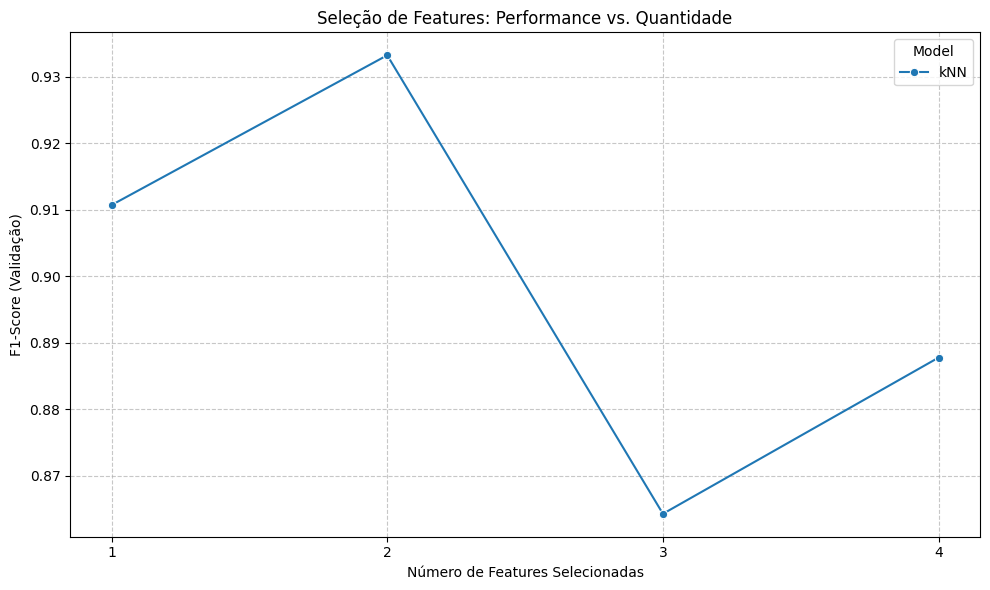

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

# 1. Extrair os dados da nova estrutura
dados_features = []
for entry in experiment_results:
    # Iterar diretamente sobre a lista de validação
    for val in entry['feature_selection_steps']:
        dados_features.append({
            'Model': val['model'],
            'k_Features': val['k_features'],
            'Validation_F1': val['F1']
        })

# 2. Criar o DataFrame
df_features = pd.DataFrame(dados_features)

# 3. Gerar o Gráfico
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_features, 
    x='k_Features', 
    y='Validation_F1', 
    hue='Model',       # Cor por modelo
    style='Model',     # Estilo de linha por modelo
    markers=True, 
    dashes=False
)

plt.title('Seleção de Features: Performance vs. Quantidade')
plt.xlabel('Número de Features Selecionadas')
plt.ylabel('F1-Score (Validação)')
plt.grid(True, linestyle='--', alpha=0.7)

# Forçar o eixo X a mostrar apenas números inteiros (1, 2, 3...)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [8]:
display(Markdown("### Exercise 2.4"))

models = {
    "kNN": KNeighborsClassifier()
}
model_parameters = {
    "kNN": {"n_neighbors": list(range(1, 16, 2))}###até 15
}
exp = Experiment(X, y, models, model_parameters)
experiment_results=exp.run_cross_with_validation_feature_selection(n_repeats=10,number_of_folds=10,test_size=0.3)

### Exercise 2.4

MATRIZ DE COTOVELO - F1 MÉDIO POR NÚMERO DE FEATURES
K (Features)    F1 Médio        Desvio Padrão   Amostras  
------------------------------------------------------------
1               0.9547          0.0306          100       
2               0.9594          0.0263          100       
3               0.9588          0.0269          100       
4               0.9602          0.0247          100       


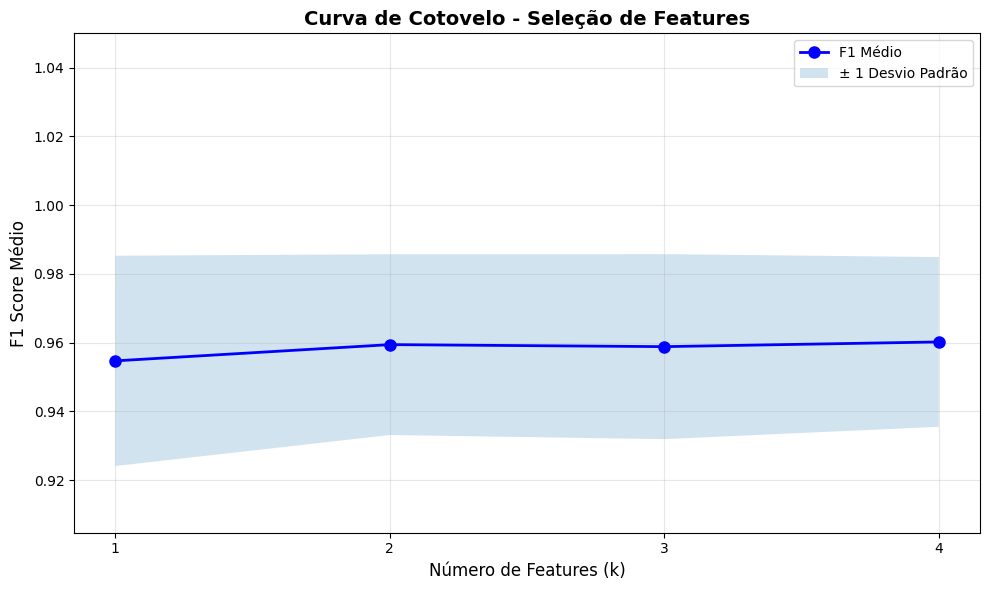


ANÁLISE DE GANHO MARGINAL:
------------------------------------------------------------
k=1 → k=2: Ganho = 0.0047
k=2 → k=3: Ganho = -0.0006
k=3 → k=4: Ganho = 0.0014


In [11]:
def extract_elbow_data(results):
    """
    Extrai os dados para análise de cotovelo
    """
    all_curves = []
    
    for exp in results:
        for model in exp['models']:
            if 'feature_selection_curve' in model:
                curve = model['feature_selection_curve']
                all_curves.append(curve)
    
    # Organizar por número de features (k)
    k_values = {}
    for curve in all_curves:
        for point in curve:
            k = point['num_features']
            f1 = point['val_f1']
            
            if k not in k_values:
                k_values[k] = []
            k_values[k].append(f1)
    
    # Calcular média para cada k
    elbow_matrix = []
    for k in sorted(k_values.keys()):
        f1_scores = k_values[k]
        avg_f1 = np.mean(f1_scores)
        std_f1 = np.std(f1_scores)
        
        elbow_matrix.append({
            'k': k,
            'avg_f1': avg_f1,
            'std_f1': std_f1,
            'num_samples': len(f1_scores)
        })
    
    return elbow_matrix

# Calcular matriz de cotovelo
elbow_data = extract_elbow_data(experiment_results)

# Mostrar resultados
print("=" * 60)
print("MATRIZ DE COTOVELO - F1 MÉDIO POR NÚMERO DE FEATURES")
print("=" * 60)
print(f"{'K (Features)':<15} {'F1 Médio':<15} {'Desvio Padrão':<15} {'Amostras':<10}")
print("-" * 60)

for data in elbow_data:
    print(f"{data['k']:<15} {data['avg_f1']:<15.4f} {data['std_f1']:<15.4f} {data['num_samples']:<10}")

print("=" * 60)

# Visualizar curva de cotovelo
plt.figure(figsize=(10, 6))

k_vals = [d['k'] for d in elbow_data]
f1_vals = [d['avg_f1'] for d in elbow_data]
std_vals = [d['std_f1'] for d in elbow_data]

plt.plot(k_vals, f1_vals, 'bo-', linewidth=2, markersize=8, label='F1 Médio')
plt.fill_between(k_vals, 
                 np.array(f1_vals) - np.array(std_vals), 
                 np.array(f1_vals) + np.array(std_vals), 
                 alpha=0.2, label='± 1 Desvio Padrão')

plt.xlabel('Número de Features (k)', fontsize=12)
plt.ylabel('F1 Score Médio', fontsize=12)
plt.title('Curva de Cotovelo - Seleção de Features', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(k_vals)
plt.ylim([min(f1_vals) - 0.05, 1.05])

plt.tight_layout()
plt.show()

# Encontrar o "cotovelo" (ponto de maior ganho marginal)
print("\nANÁLISE DE GANHO MARGINAL:")
print("-" * 60)
for i in range(1, len(elbow_data)):
    prev_f1 = elbow_data[i-1]['avg_f1']
    curr_f1 = elbow_data[i]['avg_f1']
    gain = curr_f1 - prev_f1
    print(f"k={elbow_data[i-1]['k']} → k={elbow_data[i]['k']}: Ganho = {gain:.4f}")

A calcular Feature Ranking (ReliefF)...


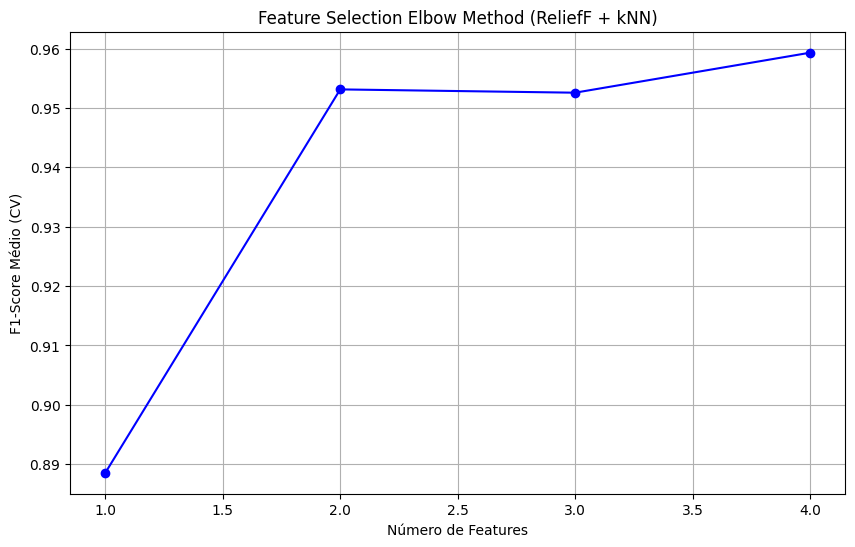

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from skrebate import ReliefF

# --- 1. Calcular o Ranking (Apenas uma vez!) ---
print("A calcular Feature Ranking (ReliefF)...")
relief = ReliefF(n_neighbors=100, n_jobs=-1) # n_jobs=-1 usa todos os cores do CPU
relief.fit(X, y)

# Ordenar índices do maior para o menor (descendente)
ranking = np.argsort(relief.feature_importances_)[::-1] 

# --- 2. Configurar a Validação ---
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []


feature_counts = range(1, 5)


# --- 3. Ciclo de Teste (Elbow Method) ---
for k in feature_counts:
    model = KNeighborsClassifier(n_neighbors=1)
    

    X_subset = X[:, ranking[:k]]
    
    scores = cross_val_score(model, X_subset, y, cv=cv, scoring='f1_macro')
    results.append(scores.mean())
    

plt.figure(figsize=(10, 6))

plt.plot(feature_counts, results, marker='o', linestyle='-', color='b')

plt.title('Feature Selection Elbow Method (ReliefF + kNN)')
plt.xlabel('Número de Features')
plt.ylabel('F1-Score Médio (CV)')
plt.grid(True)
plt.show()



k=1: F1 Médio = 0.9593
k=2: F1 Médio = 0.9454
k=3: F1 Médio = 0.9593
k=4: F1 Médio = 0.9593
k=5: F1 Médio = 0.9526
k=6: F1 Médio = 0.9663
k=7: F1 Médio = 0.9731
k=8: F1 Médio = 0.9596
k=9: F1 Médio = 0.9597
k=10: F1 Médio = 0.9464
k=11: F1 Médio = 0.9597
k=12: F1 Médio = 0.9597
k=13: F1 Médio = 0.9663
k=14: F1 Médio = 0.9663
k=15: F1 Médio = 0.9663
k=16: F1 Médio = 0.9663
k=17: F1 Médio = 0.9798
k=18: F1 Médio = 0.9798
k=19: F1 Médio = 0.9798
k=20: F1 Médio = 0.9663


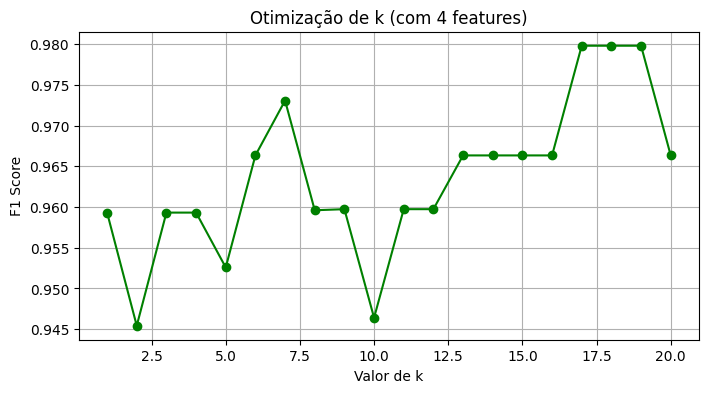

In [ ]:
k_candidates = range(1,21,1)
cv_scores = []

# Cross-Validation com 10 Stratification
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for k in k_candidates:
    # Configura o modelo com o k atual
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Treina e Avalia nos 10 folds (Tr1..TrN -> Te1..TeN)
    # Usa 'f1_macro' porque as tuas classes podem estar desbalanceadas
    scores = cross_val_score(knn, X, y, cv=cv, scoring='f1_macro')
    
    # Guarda a média dos 10 testes
    mean_score = scores.mean()
    cv_scores.append(mean_score)
    print(f"k={k}: F1 Médio = {mean_score:.4f}")

# Gráfico da Otimização do k (Opcional, mas bom para o relatório)
plt.figure(figsize=(8, 4))
plt.plot(k_candidates, cv_scores, marker='o', color='green')
plt.title(f'Otimização de k (com {4} features)')
plt.xlabel('Valor de k')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

K com melhor f1 medio é 17 

In [22]:
final_model = KNeighborsClassifier(n_neighbors=17)

final_model.fit(X, y)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None
